<a href="https://colab.research.google.com/github/AnniaBenitez/Cores_mod2/blob/main/Core_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.impute import SimpleImputer

In [53]:
import kagglehub
import os

# Download latest version
pathUsedCarsPrice = kagglehub.dataset_download("abdullahempapy/used-cars-price")

print("Path to dataset files:", pathUsedCarsPrice)

# Download latest version
pathRamen = kagglehub.dataset_download("residentmario/ramen-ratings")

print("Path to dataset files:", pathRamen)

# Download latest version
pathMostVisitedCountry = kagglehub.dataset_download("arpitsinghaiml/most-visited-country-dataset")

print("Path to dataset files:", pathMostVisitedCountry)

# Download latest version
pathStudentAdmission = kagglehub.dataset_download("zeeshier/student-admission-records")

print("Path to dataset files:", pathStudentAdmission)

Path to dataset files: /root/.cache/kagglehub/datasets/abdullahempapy/used-cars-price/versions/1
Path to dataset files: /root/.cache/kagglehub/datasets/residentmario/ramen-ratings/versions/1
Path to dataset files: /root/.cache/kagglehub/datasets/arpitsinghaiml/most-visited-country-dataset/versions/1
Path to dataset files: /root/.cache/kagglehub/datasets/zeeshier/student-admission-records/versions/1


In [54]:
print(os.listdir(pathRamen))


['ramen-ratings.csv']


In [55]:
# Dataset 1: Used Cars Price
used_cars_file = os.path.join(pathUsedCarsPrice, "Cars Dataset.csv")  # Reemplaza "file_name.csv" con el nombre del archivo específico
df_used_cars = pd.read_csv(used_cars_file)
print("Used Cars Dataset:")
print(df_used_cars.head())

# Dataset 2: NYTimes Best Restaurants 2024
ramen_file = os.path.join(pathRamen, "ramen-ratings.csv")  # Reemplaza "file_name.csv" con el nombre del archivo específico
df_ramen = pd.read_csv(ramen_file)
print("NYTimes Best Restaurants Dataset:")
print(df_ramen.head())

# Dataset 3: Most Visited Country
most_visited_file = os.path.join(pathMostVisitedCountry, "most-visited-countries-2024.csv")  # Reemplaza "file_name.csv" con el nombre del archivo específico
df_most_visited = pd.read_csv(most_visited_file)
print("Most Visited Country Dataset:")
print(df_most_visited.head())

# Dataset 4: Student Admission Records
student_admission_file = os.path.join(pathStudentAdmission, "student_admission_record_dirty.csv")  # Reemplaza "file_name.csv" con el nombre del archivo específico
df_student_admission = pd.read_csv(student_admission_file)
print("Student Admission Records Dataset:")
print(df_student_admission.head())

Used Cars Dataset:
                Model    Year    Km/h      Color       Type      Fuel    Price
0  Hyundai Elantra HD  2009.0  165,000      Gray  Automatic  Gasoline  560,000
1     Hyundai Elantra  2010.0  194,000     Black  Automatic  Gasoline  600,000
2  Hyundai Elantra HD  2010.0  205,000    Silver  Automatic  Gasoline  575,000
3     Hyundai Elantra  2010.0  160,000     Black  Automatic  Gasoline  550,000
4     Hyundai Elantra  2009.0  140,451  Eggplant  Automatic  Gasoline  650,000
NYTimes Best Restaurants Dataset:
   Review #           Brand  \
0      2580       New Touch   
1      2579        Just Way   
2      2578          Nissin   
3      2577         Wei Lih   
4      2576  Ching's Secret   

                                             Variety Style Country Stars  \
0                          T's Restaurant Tantanmen    Cup   Japan  3.75   
1  Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...  Pack  Taiwan     1   
2                      Cup Noodles Chicken Vegetable   Cup

# Dataset 1: Used Car's Price
Model: car's name

Year: Made in year

Km/h: Amount which moved

Color: Car's Color

Type: Manual Or Automatic

Fuel: Type of engine Fuel

Price: Price of the car

In [56]:
df_used_cars.head()

,Model,Year,Km/h,Color,Type,Fuel,Price
0,Hyundai Elantra HD,2009.0,"165,000",Gray,Automatic,Gasoline,"560,000"
1,Hyundai Elantra,2010.0,"194,000",Black,Automatic,Gasoline,"600,000"
2,Hyundai Elantra HD,2010.0,"205,000",Silver,Automatic,Gasoline,"575,000"
3,Hyundai Elantra,2010.0,"160,000",Black,Automatic,Gasoline,"550,000"
4,Hyundai Elantra,2009.0,"140,451",Eggplant,Automatic,Gasoline,"650,000"


In [57]:
df_used_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957 entries, 0 to 956
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Model   599 non-null    object 
 1   Year    599 non-null    float64
 2    Km/h   599 non-null    object 
 3   Color   599 non-null    object 
 4   Type    599 non-null    object 
 5   Fuel    599 non-null    object 
 6   Price   599 non-null    object 
dtypes: float64(1), object(6)
memory usage: 52.5+ KB


In [58]:
print(df_used_cars.columns)


Index(['Model', 'Year', ' Km/h ', 'Color', 'Type', 'Fuel', 'Price'], dtype='object')


In [59]:
# Supongamos que df es el DataFrame cargado
# Reemplaza "," por "" (si los precios tienen separadores de miles) y convierte a float
df_used_cars['Price'] = df_used_cars['Price'].str.replace(",", "").astype(float)
df_used_cars = df_used_cars.rename(columns={' Km/h ': "Speed"})
print(df_used_cars.columns)
df_used_cars['Speed'] = df_used_cars['Speed'].str.replace(",", "").astype(float)

# Máximo y mínimo de "Price"
max_price = df_used_cars['Price'].max()
min_price = df_used_cars['Price'].min()

# Máximo y mínimo de "Km/h"
max_kmh = df_used_cars['Speed'].max()
min_kmh = df_used_cars['Speed'].min()

# Resultados
print(f"Máximo precio: {max_price} €")
print(f"Mínimo precio: {min_price} €")
print(f"Máxima velocidad (Km/h): {max_kmh}")
print(f"Mínima velocidad (Km/h): {min_kmh}")


Index(['Model', 'Year', 'Speed', 'Color', 'Type', 'Fuel', 'Price'], dtype='object')
Máximo precio: 9200000.0 €
Mínimo precio: 150000.0 €
Máxima velocidad (Km/h): 500000.0
Mínima velocidad (Km/h): 1.0


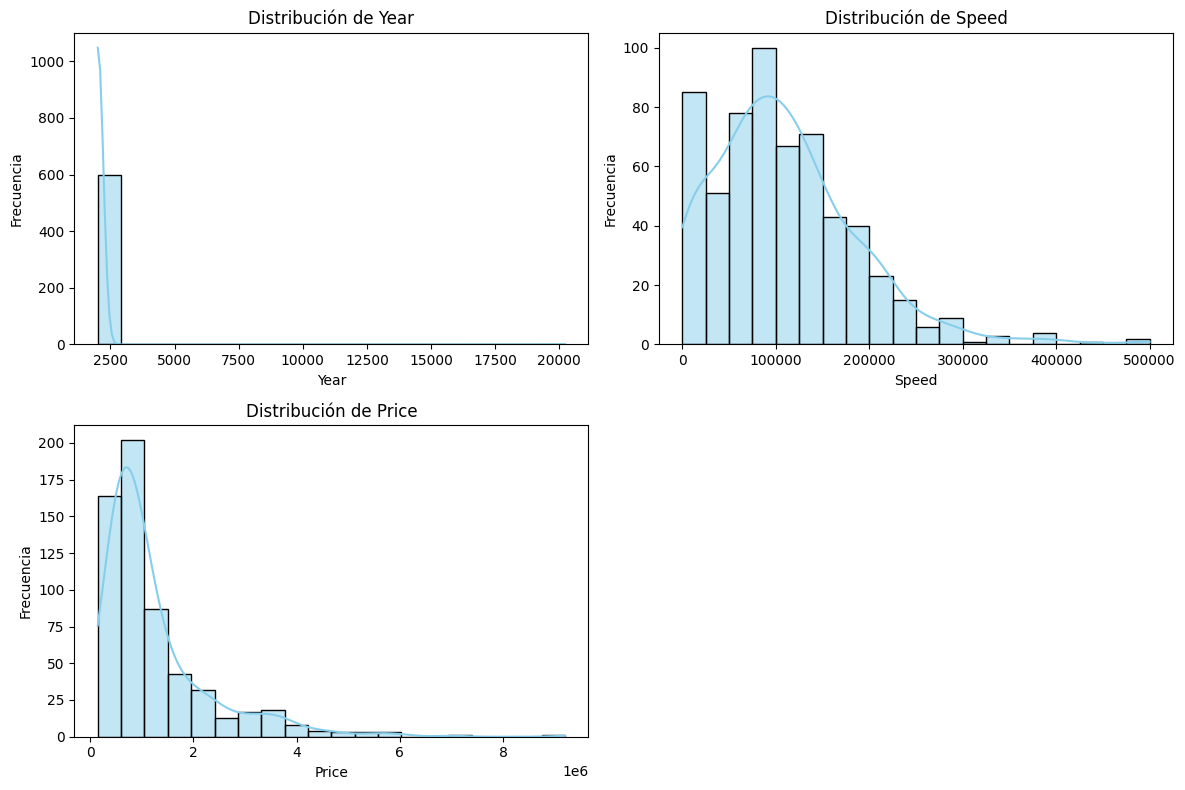

In [60]:
# Crear histogramas para 'Year', 'Speed' y 'Price'
columns_to_plot = ['Year', 'Speed', 'Price']

plt.figure(figsize=(12, 8))
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_used_cars[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


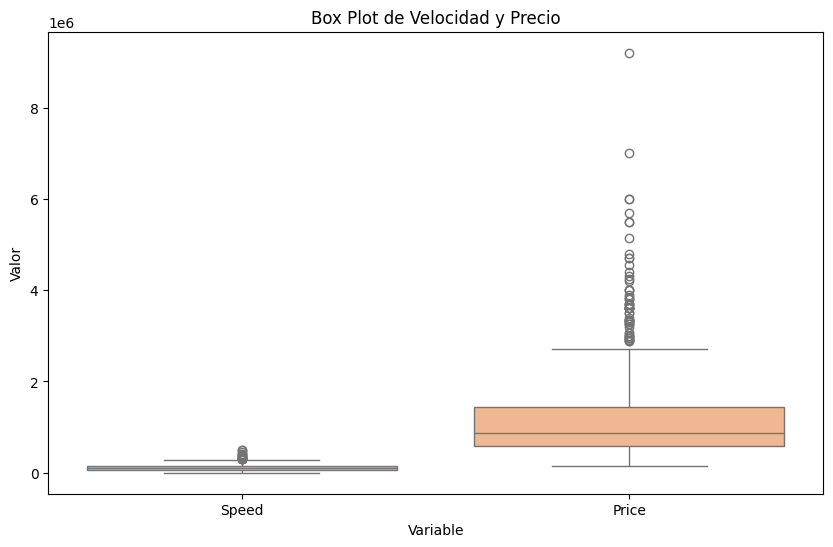

In [61]:
# Crear box plot para analizar outliers en 'Speed' y 'Price'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_used_cars[['Speed', 'Price']], palette="pastel")
plt.title("Box Plot de Velocidad y Precio")
plt.xlabel("Variable")
plt.ylabel("Valor")
plt.show()


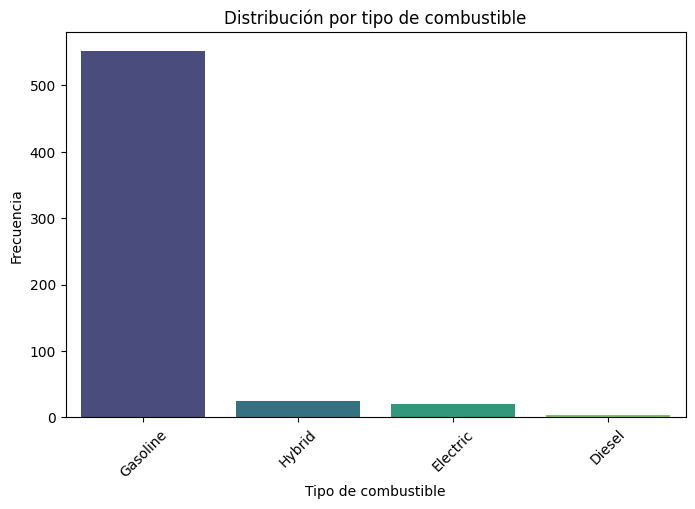

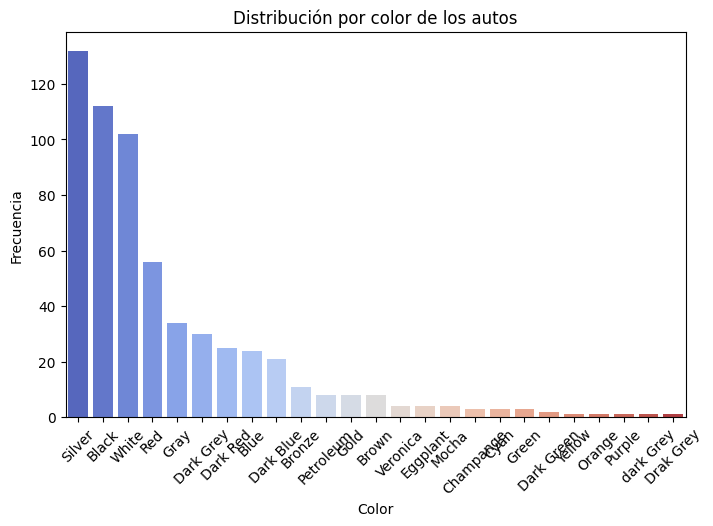

In [62]:
# Distribución de tipos de combustible
plt.figure(figsize=(8, 5))
sns.countplot(data=df_used_cars, x='Fuel', palette='viridis', order=df_used_cars['Fuel'].value_counts().index)
plt.title("Distribución por tipo de combustible")
plt.xlabel("Tipo de combustible")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.show()

# Distribución de colores de los autos
plt.figure(figsize=(8, 5))
sns.countplot(data=df_used_cars, x='Color', palette='coolwarm', order=df_used_cars['Color'].value_counts().index)
plt.title("Distribución por color de los autos")
plt.xlabel("Color")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.show()


In [63]:
imputer = SimpleImputer(strategy='mean')

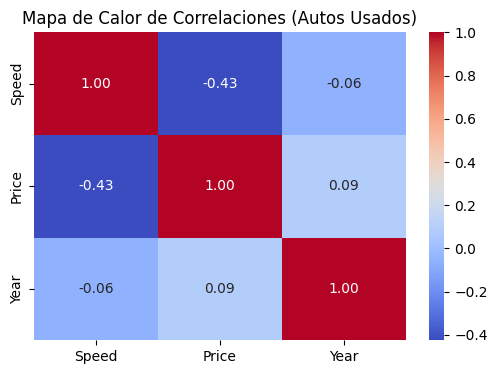

In [64]:
# Crear DataFrame con columnas numéricas para correlación
df_cars_corr = df_used_cars[[ 'Speed', 'Price', 'Year']].dropna()
correlation_matrix_cars = df_cars_corr.corr()

# Gráfico de calor
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix_cars, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de Calor de Correlaciones (Autos Usados)")
plt.show()


In [65]:
categorical_columns = ['Model', 'Color', 'Type', 'Fuel']
numerical_columns = ['Year']

# Preprocesador para df_used_cars
preprocessor_used_cars = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),  # Imputar valores nulos
            ('scaler', StandardScaler())  # Estandarizar valores numéricos
        ]), numerical_columns),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputar valores nulos
            ('encoder', OneHotEncoder(drop='first'))  # Codificación OneHot
        ]), categorical_columns)
    ])

# Dataset 2: RAMEN
Review: id de review

brand: marca

variety: Nombre del tipo de ramen

Style: forma en que se sirve

Country: Ciudad

Stars: puntuacion

top ten: Si está en el top

In [66]:
df_ramen.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [67]:
df_ramen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  2580 non-null   int64 
 1   Brand     2580 non-null   object
 2   Variety   2580 non-null   object
 3   Style     2578 non-null   object
 4   Country   2580 non-null   object
 5   Stars     2580 non-null   object
 6   Top Ten   41 non-null     object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB


In [68]:
df_ramen['Top Ten'].unique()

array([nan, '2016 #10', '2016 #1', '2016 #8', '2016 #5', '2016 #9',
       '2016 #7', '2015 #10', '2015 #7', '2015 #4', '2015 #9', '2015 #6',
       '2015 #1', '2013 #10', '2015 #8', '2014 #7', '2014 #4', '2014 #9',
       '2014 #10', '2014 #8', '2014 #5', '2014 #6', '2014 #1', '2013 #1',
       '2013 #2', '2013 #4', '\n', '2013 #9', '2013 #3', '2012 #10',
       '2012 #7', '2012 #5', '2012 #3', '2012 #6', '2012 #9', '2012 #1',
       '2012 #2', '2013 #6', '2012 #4'], dtype=object)

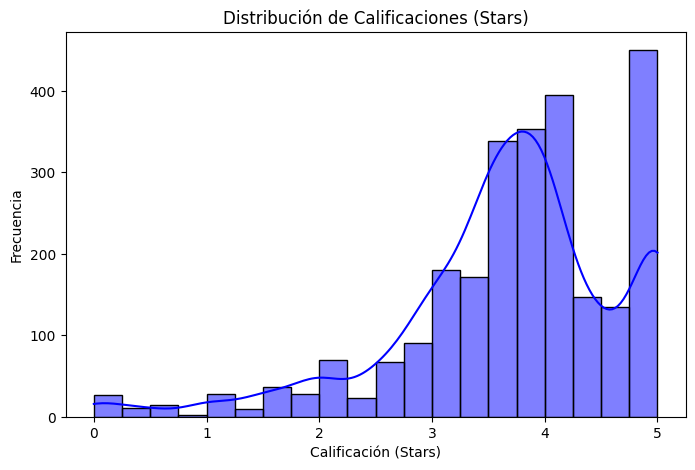

In [69]:
df_ramen['Stars'] = pd.to_numeric(df_ramen['Stars'], errors='coerce')
plt.figure(figsize=(8, 5))
sns.histplot(df_ramen['Stars'], bins=20, kde=True, color='blue')
plt.title("Distribución de Calificaciones (Stars)")
plt.xlabel("Calificación (Stars)")
plt.ylabel("Frecuencia")
plt.show()


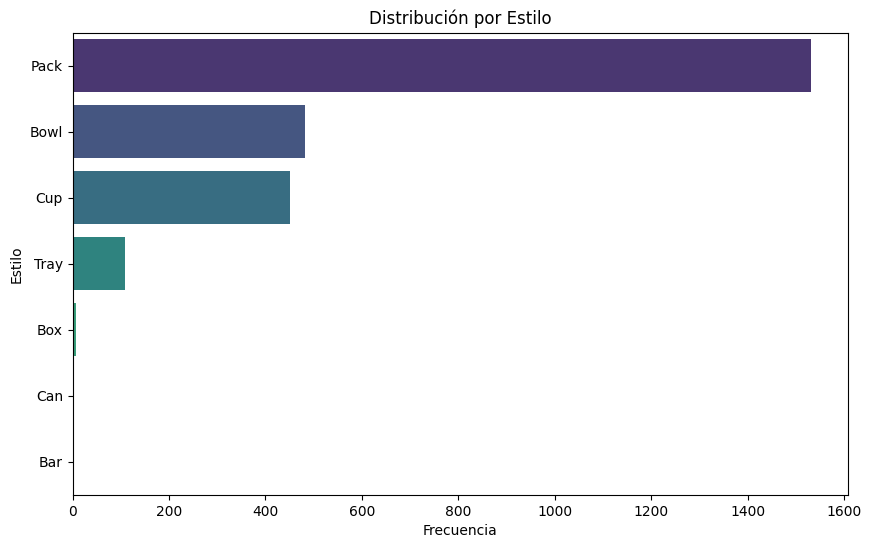

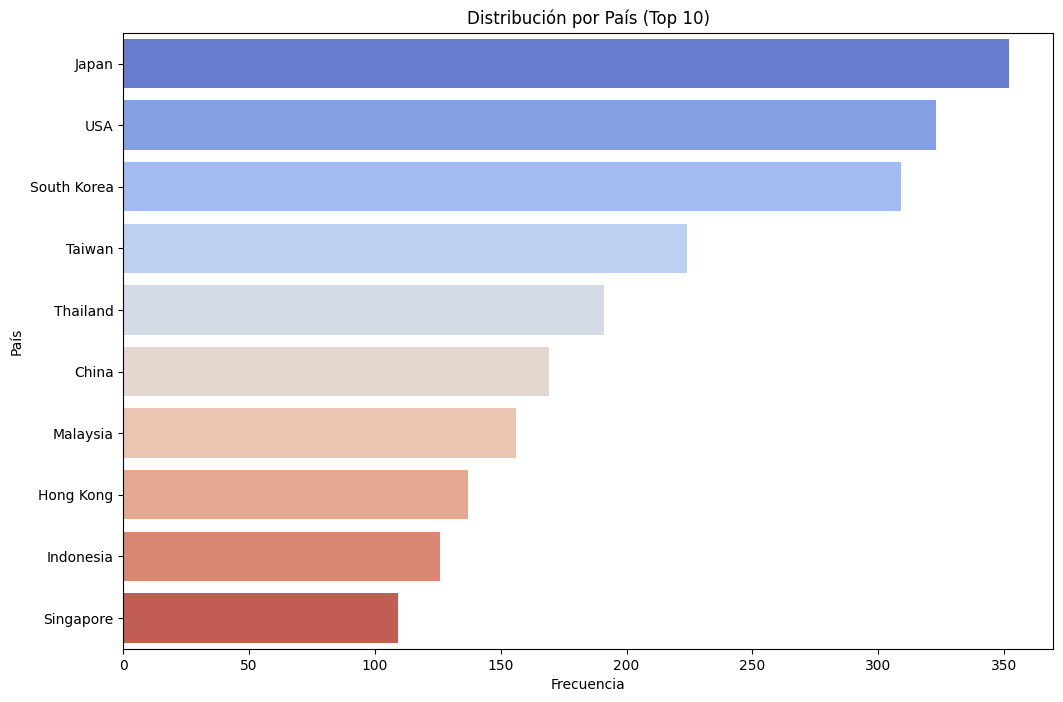

In [70]:
# Distribución de Style
plt.figure(figsize=(10, 6))
sns.countplot(data=df_ramen, y='Style', palette='viridis', order=df_ramen['Style'].value_counts().index)
plt.title("Distribución por Estilo")
plt.xlabel("Frecuencia")
plt.ylabel("Estilo")
plt.show()

# Distribución de países
plt.figure(figsize=(12, 8))
sns.countplot(data=df_ramen, y='Country', palette='coolwarm', order=df_ramen['Country'].value_counts().head(10).index)
plt.title("Distribución por País (Top 10)")
plt.xlabel("Frecuencia")
plt.ylabel("País")
plt.show()


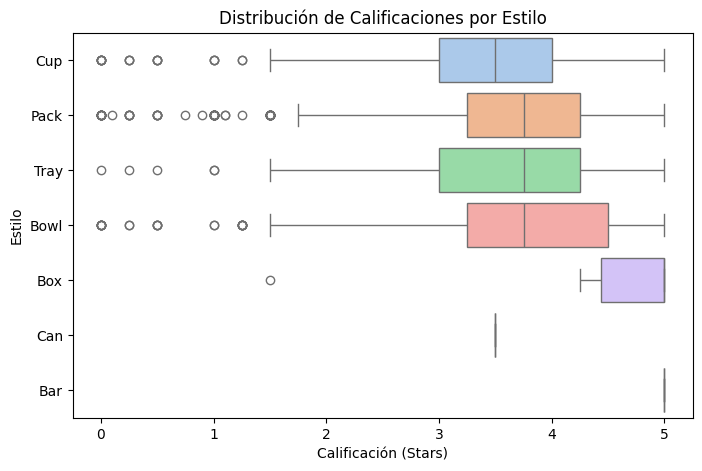

In [71]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_ramen, x='Stars', y='Style', palette='pastel')
plt.title("Distribución de Calificaciones por Estilo")
plt.xlabel("Calificación (Stars)")
plt.ylabel("Estilo")
plt.show()


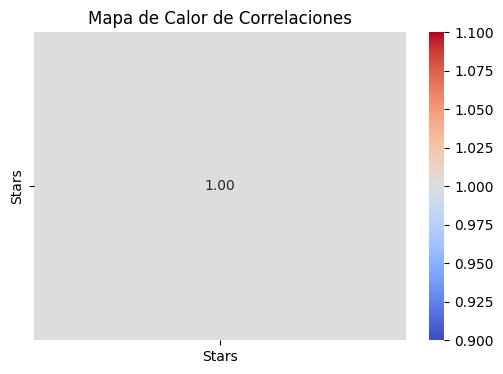

In [72]:
# Crear un DataFrame solo con columnas numéricas
df_corr = df_ramen[['Stars']]
correlation_matrix = df_corr.corr()

# Gráfico de calor
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de Calor de Correlaciones")
plt.show()


In [73]:
# Columnas categóricas en df_ramen
categorical_columns_ramen = ['Brand', 'Variety', 'Style', 'Country', 'Stars']
numerical_columns_ramen = []  # En este caso, no hay columnas numéricas directas

# Preprocesador para df_ramen
preprocessor_ramen = ColumnTransformer(
    transformers=[
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputar valores nulos con el valor más frecuente
            ('encoder', OneHotEncoder(drop='first'))  # Codificación OneHot, eliminamos la primera categoría para evitar la multicolinealidad
        ]), categorical_columns_ramen)
    ])


# Dataset 3: Most Visited Country

country: Country

MostVisited_NumOfArrivalsPredictive_Millions_2024: Most visited in 2024

MostVisited_NumOfArrivals_Millions_2023: Most visited in 2023

MostVisited_NumOfArrivals_Millions_2022: Most visited in 2022

MostVisited_NumOfArrivals_WorldBank: Most arrivals World Bank

MostVisited_DataYear_WorldBank: MostVisited DatayearWorld Bank

In [74]:
df_most_visited.head()

,country,MostVisited_NumOfArrivalsPredictive_Millions_2024,MostVisited_NumOfArrivals_Millions_2023,MostVisited_NumOfArrivals_Millions_2022,MostVisited_NumOfArrivals_WorldBank,MostVisited_DataYear_WorldBank
0,India,17.9,NaN,NaN,17914000.0,2019.0
1,China,65.7,NaN,NaN,30402000.0,2020.0
2,United States,79.3,66.48,50.87,45037000.0,2020.0
3,Indonesia,15.5,NaN,NaN,4053000.0,2020.0
4,Pakistan,NaN,NaN,NaN,966000.0,2012.0


In [75]:
df_most_visited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 6 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   country                                            203 non-null    object 
 1   MostVisited_NumOfArrivalsPredictive_Millions_2024  50 non-null     float64
 2   MostVisited_NumOfArrivals_Millions_2023            49 non-null     float64
 3   MostVisited_NumOfArrivals_Millions_2022            20 non-null     float64
 4   MostVisited_NumOfArrivals_WorldBank                202 non-null    float64
 5   MostVisited_DataYear_WorldBank                     202 non-null    float64
dtypes: float64(5), object(1)
memory usage: 9.6+ KB


In [76]:
# Rellenar valores faltantes en las columnas de años con la media de cada columna
for col in ['MostVisited_NumOfArrivalsPredictive_Millions_2024', 'MostVisited_NumOfArrivals_Millions_2023', 'MostVisited_NumOfArrivals_Millions_2022']:
    df_most_visited[col].fillna(df_most_visited[col].mean(), inplace=True)

# Rellenar valores faltantes en Arrivals_WorldBank con la mediana
df_most_visited['MostVisited_NumOfArrivals_WorldBank'].fillna(df_most_visited['MostVisited_NumOfArrivals_WorldBank'].median(), inplace=True)


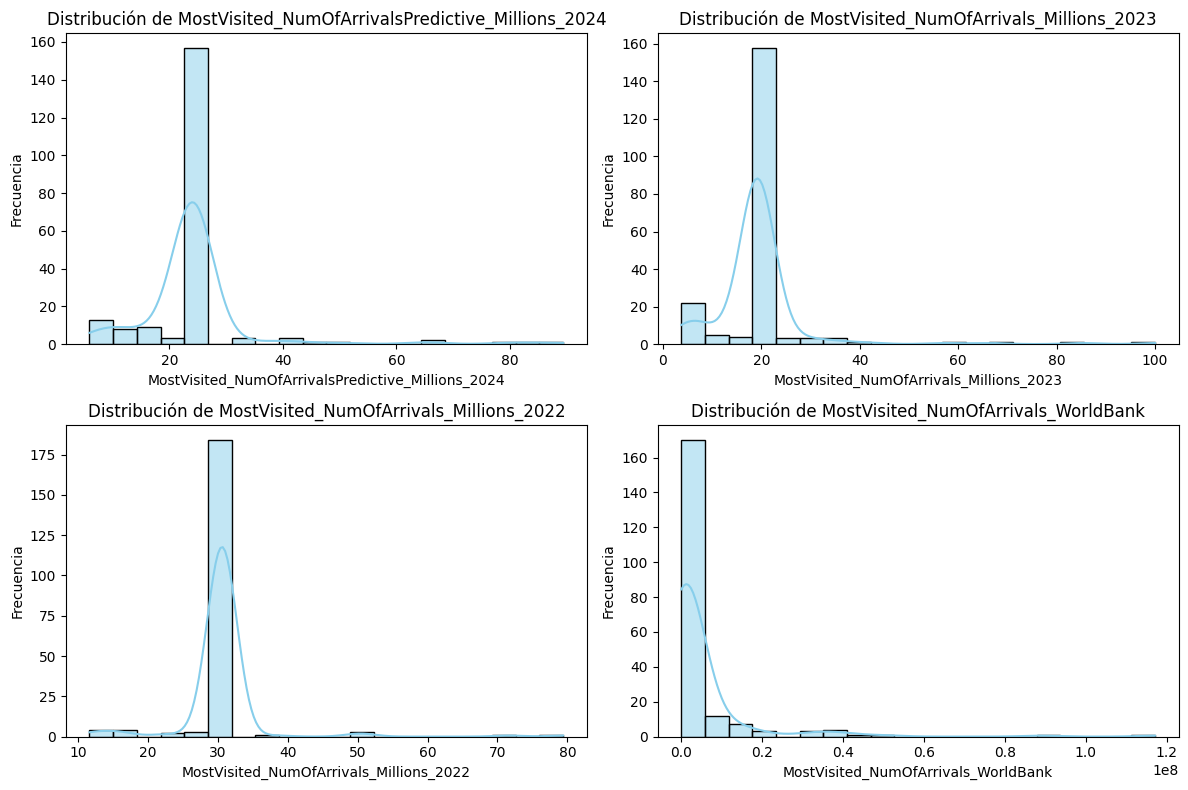

In [77]:
# Crear histogramas para columnas seleccionadas
columns_to_plot = ['MostVisited_NumOfArrivalsPredictive_Millions_2024', 'MostVisited_NumOfArrivals_Millions_2023', 'MostVisited_NumOfArrivals_Millions_2022', 'MostVisited_NumOfArrivals_WorldBank']

plt.figure(figsize=(12, 8))
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_most_visited[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

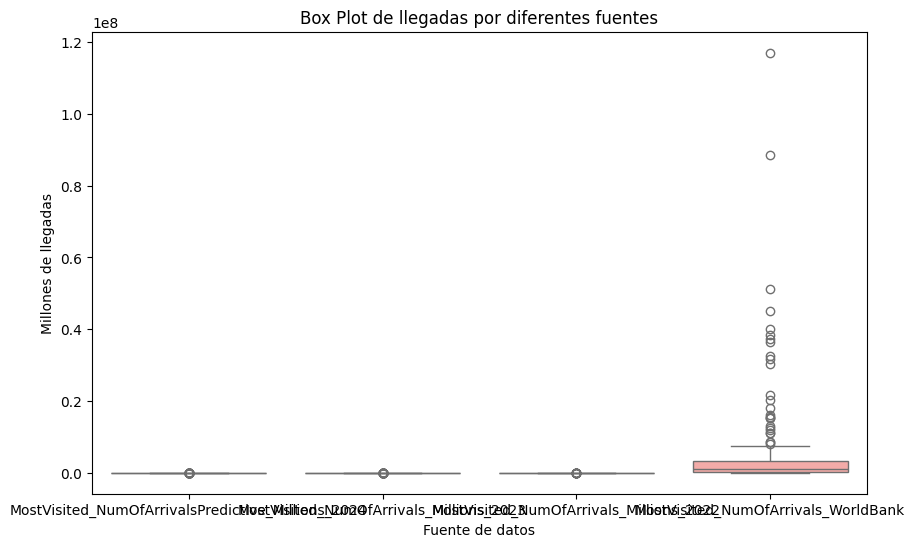

In [78]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_most_visited[columns_to_plot], palette="pastel")
plt.title("Box Plot de llegadas por diferentes fuentes")
plt.xlabel("Fuente de datos")
plt.ylabel("Millones de llegadas")
plt.show()

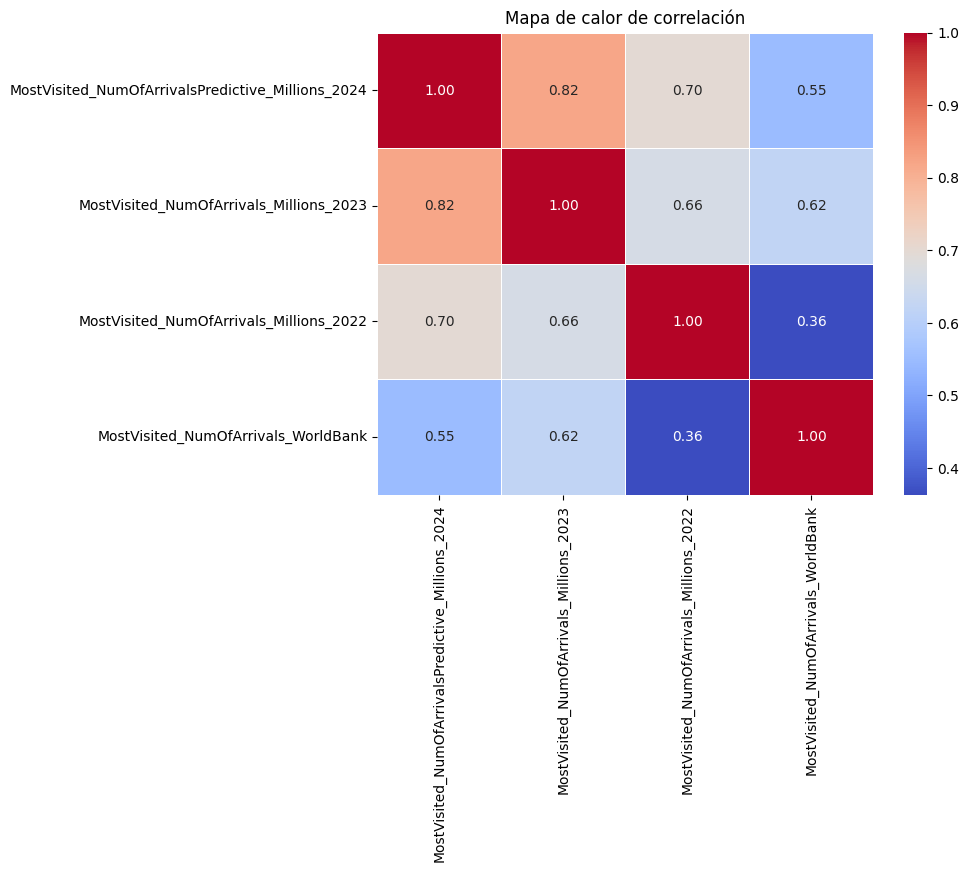

In [79]:
# Calcular la matriz de correlación
correlation_matrix = df_most_visited[columns_to_plot].corr()

# Crear un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Mapa de calor de correlación")
plt.show()


In [80]:
categorical_columns_visited = ['country']
numerical_columns_visited = ['MostVisited_NumOfArrivalsPredictive_Millions_2024',
                             'MostVisited_NumOfArrivals_Millions_2023',
                             'MostVisited_NumOfArrivals_Millions_2022',
                             'MostVisited_NumOfArrivals_WorldBank',
                             'MostVisited_DataYear_WorldBank']

# Preprocesador para df_most_visited
preprocessor_visited = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),  # Imputar valores nulos
            ('scaler', StandardScaler())  # Estandarizar valores numéricos
        ]), numerical_columns_visited),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputar valores nulos
            ('encoder', OneHotEncoder(drop='first'))  # Codificación OneHot
        ]), categorical_columns_visited)
    ])

# Dataset 4: Student Admission Records

Name: Student's first name (Pakistani names).

Age: Age of the student (some outliers and missing values).

Gender: Gender (Male/Female).

Admission Test Score: Score obtained in the admission test (includes outliers and missing values).

High School Percentage: Student's high school final score percentage (includes outliers and missing values).

City: City of residence in Pakistan.

Admission Status: Whether the student was accepted or rejected.

In [81]:
df_student_admission.head()

,Name,Age,Gender,Admission Test Score,High School Percentage,City,Admission Status
0,Shehroz,24.0,Female,50.0,68.90,Quetta,Rejected
1,Waqar,21.0,Female,99.0,60.73,Karachi,NaN
2,Bushra,17.0,Male,89.0,NaN,Islamabad,Accepted
3,Aliya,17.0,Male,55.0,85.29,Karachi,Rejected
4,Bilal,20.0,Male,65.0,61.13,Lahore,NaN


In [82]:
df_student_admission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    147 non-null    object 
 1   Age                     147 non-null    float64
 2   Gender                  147 non-null    object 
 3   Admission Test Score    146 non-null    float64
 4   High School Percentage  146 non-null    float64
 5   City                    147 non-null    object 
 6   Admission Status        147 non-null    object 
dtypes: float64(3), object(4)
memory usage: 8.7+ KB


In [83]:
# Máximo y mínimo de "Price"
max_price = df_student_admission[['Age', 'Admission Test Score', 'High School Percentage']].max()
min_price = df_student_admission[['Age', 'Admission Test Score', 'High School Percentage']].min()

# Resultados
print(f"Máximo : {max_price} €")
print(f"Mínimo : {min_price} €")


Máximo : Age                        24.0
Admission Test Score      150.0
High School Percentage    110.5
dtype: float64 €
Mínimo : Age                       -1.0
Admission Test Score      -5.0
High School Percentage   -10.0
dtype: float64 €


In [84]:
df_student_admission['Age'] = df_student_admission['Age'].apply(lambda x: np.nan if x < 0 else x)
age_median = df_student_admission['Age'].median()  # Usamos la mediana como referencia
df_student_admission['Age'].fillna(age_median, inplace=True)

df_student_admission['High School Percentage'] = df_student_admission['High School Percentage'].apply(lambda x: np.nan if x < 0 else x)
percentage_median = df_student_admission['High School Percentage'].median()  # Usamos la mediana como referencia
df_student_admission['High School Percentage'].fillna(percentage_median, inplace=True)

print(df_student_admission[['Age', 'High School Percentage']].describe())

              Age  High School Percentage
count  157.000000              157.000000
mean    20.369427               76.383758
std      2.262534               15.268665
min     17.000000                0.000000
25%     19.000000               67.030000
50%     20.000000               77.690000
75%     22.000000               87.000000
max     24.000000              110.500000


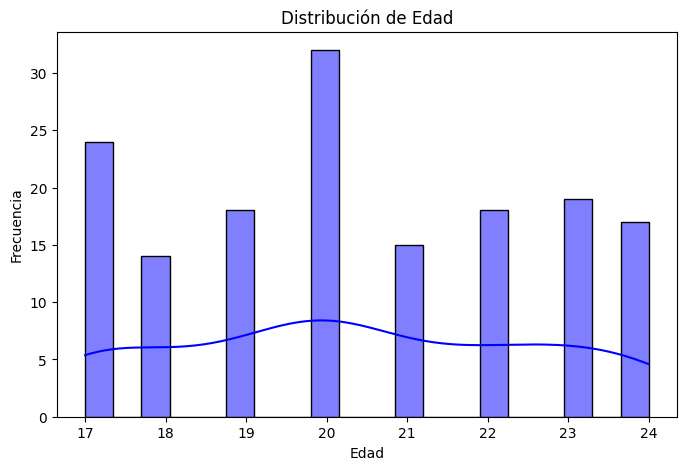

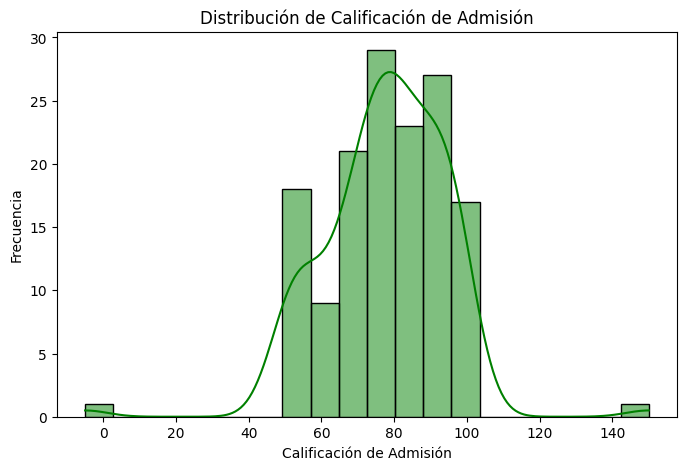

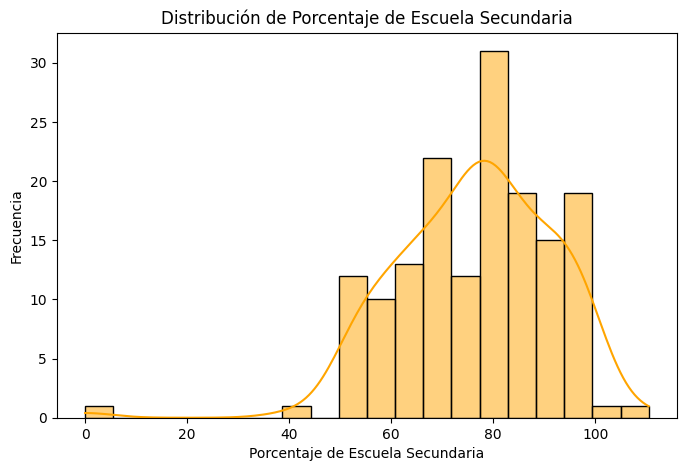

In [85]:
# Histograma para Edad
plt.figure(figsize=(8, 5))
sns.histplot(df_student_admission['Age'], bins=20, kde=True, color='blue')
plt.title("Distribución de Edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

# Histograma para Calificación de Admisión
plt.figure(figsize=(8, 5))
sns.histplot(df_student_admission['Admission Test Score'], bins=20, kde=True, color='green')
plt.title("Distribución de Calificación de Admisión")
plt.xlabel("Calificación de Admisión")
plt.ylabel("Frecuencia")
plt.show()

# Histograma para Porcentaje de Escuela Secundaria
plt.figure(figsize=(8, 5))
sns.histplot(df_student_admission['High School Percentage'], bins=20, kde=True, color='orange')
plt.title("Distribución de Porcentaje de Escuela Secundaria")
plt.xlabel("Porcentaje de Escuela Secundaria")
plt.ylabel("Frecuencia")
plt.show()


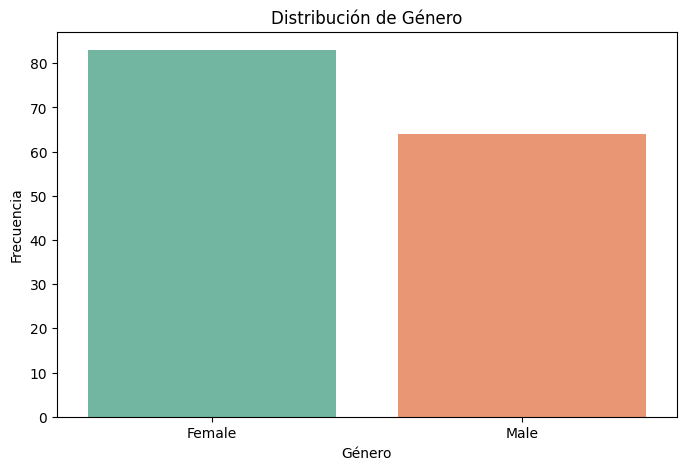

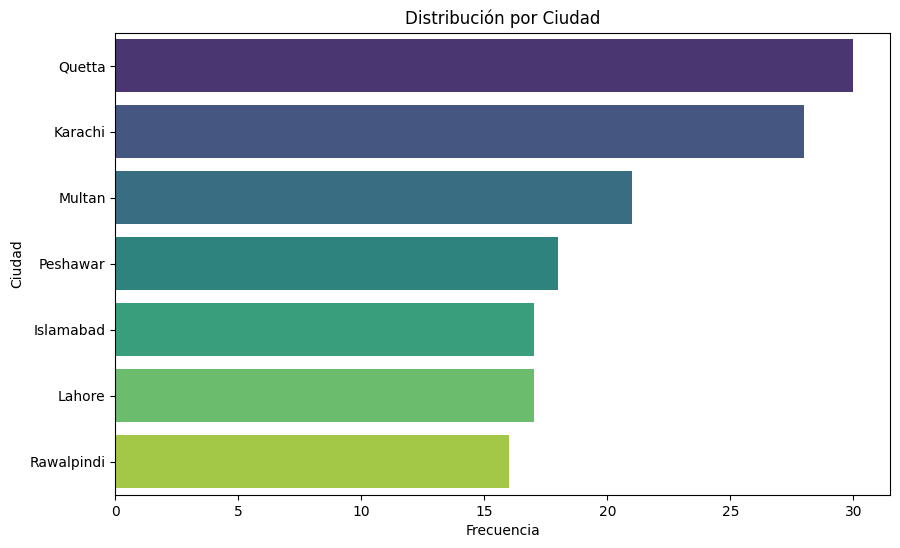

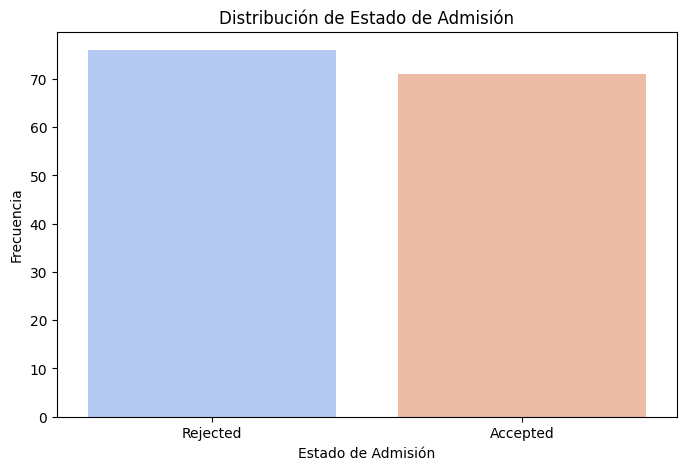

In [86]:
# Gráfico de barras para género
plt.figure(figsize=(8, 5))
sns.countplot(data=df_student_admission, x='Gender', palette='Set2')
plt.title("Distribución de Género")
plt.xlabel("Género")
plt.ylabel("Frecuencia")
plt.show()

# Gráfico de barras para Ciudad
plt.figure(figsize=(10, 6))
sns.countplot(data=df_student_admission, y='City', palette='viridis', order=df_student_admission['City'].value_counts().index)
plt.title("Distribución por Ciudad")
plt.xlabel("Frecuencia")
plt.ylabel("Ciudad")
plt.show()

# Gráfico de barras para Estado de Admisión
plt.figure(figsize=(8, 5))
sns.countplot(data=df_student_admission, x='Admission Status', palette='coolwarm')
plt.title("Distribución de Estado de Admisión")
plt.xlabel("Estado de Admisión")
plt.ylabel("Frecuencia")
plt.show()


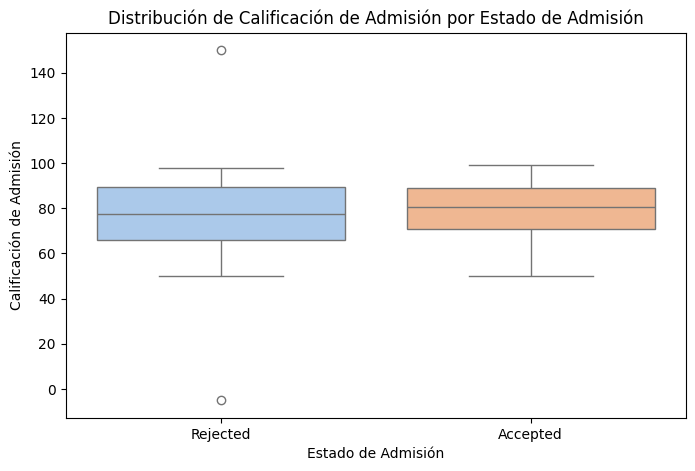

In [87]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_student_admission, x='Admission Status', y='Admission Test Score', palette='pastel')
plt.title("Distribución de Calificación de Admisión por Estado de Admisión")
plt.xlabel("Estado de Admisión")
plt.ylabel("Calificación de Admisión")
plt.show()


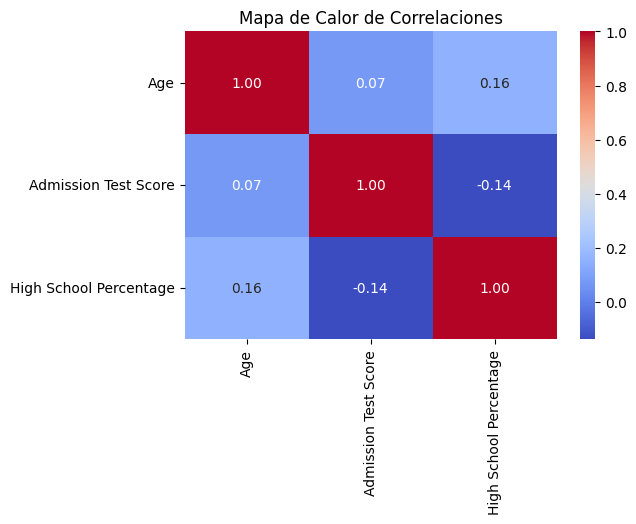

In [88]:
# Crear DataFrame solo con columnas numéricas
df_corr = df_student_admission[['Age', 'Admission Test Score', 'High School Percentage']]

# Calcular la matriz de correlación
correlation_matrix = df_corr.corr()

# Gráfico de calor
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de Calor de Correlaciones")
plt.show()


In [89]:
# Columnas categóricas y numéricas
categorical_columns_admission = ['Gender', 'City']
numerical_columns_admission = ['Age', 'Admission Test Score', 'High School Percentage']

# Preprocesador para df_student_admission
preprocessor_admission = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),  # Imputar valores nulos
            ('scaler', StandardScaler())  # Estandarizar valores numéricos
        ]), numerical_columns_admission),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputar valores nulos
            ('encoder', OneHotEncoder(drop='first'))  # Codificación OneHot
        ]), categorical_columns_admission)
    ])


In [90]:
models = {
    'Linear Regression': LinearRegression(),
    'KNN': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'XGBoost': XGBRegressor(),
    'LGBM': lgb.LGBMRegressor()
}

In [ ]:
results = {}

for name, model in models.items():
    # Pipeline completo (preprocesamiento + modelo)
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')  # Negativo para obtener el RMSE
    results[name] = np.sqrt(-scores)

# Mostrar resultados de RMSE (promedio)
for name, result in results.items():
    print(f"{name}: {result.mean():.4f} RMSE")

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

# Entrenamiento y evaluación en el dataset df_student_admission
X = df_student_admission.drop(columns=['Admission Status'])
y = df_student_admission['Admission Status']

# Aplicar one-hot encoding y escalar
X = pd.get_dummies(X, drop_first=True)

# Modelo de clasificación
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'LGBM': lgb.LGBMClassifier()
}

# Evaluar modelos
results = {}

for name, model in models.items():
    # Pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Evaluar con varias métricas
    report = classification_report(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    results[name] = {'report': report, 'ROC-AUC': roc_auc}

# Imprimir reporte de clasificación
for name, result in results.items():
    print(f"{name} - ROC-AUC: {result['ROC-AUC']:.4f}")
    print(result['report'])

GRIDSEARCH

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor
import numpy as np

# Definir los hiperparámetros para GridSearchCV
param_grid_rf = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10]
}

param_grid_lr = {
    'model__fit_intercept': [True, False],
    'model__normalize': [True, False]
}

param_grid_xgb = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__subsample': [0.8, 0.9, 1.0]
}

# Utilizar GridSearchCV para RandomForest, XGBoost y Linear Regression
models = {
    'Random Forest': RandomForestRegressor(),
    'XGBoost': XGBRegressor(),
    'Linear Regression': LinearRegression()
}

param_grids = {
    'Random Forest': param_grid_rf,
    'XGBoost': param_grid_xgb,
    'Linear Regression': param_grid_lr
}

# Evaluación de los modelos con GridSearchCV
results_grid = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor_ramen), ('model', model)])
    grid_search = GridSearchCV(pipeline, param_grid=param_grids[name], cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
    grid_search.fit(X_ramen, y_ramen)
    results_grid[name] = grid_search.best_params_

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros encontrados con GridSearchCV:")
for name, best_params in results_grid.items():
    print(f"{name}: {best_params}")


RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Definir los rangos de búsqueda para RandomizedSearchCV
param_dist_rf = {
    'model__n_estimators': randint(100, 1000),
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': randint(2, 10)
}

param_dist_xgb = {
    'model__n_estimators': randint(100, 1000),
    'model__max_depth': randint(3, 10),
    'model__learning_rate': uniform(0.01, 0.1),
    'model__subsample': uniform(0.8, 0.2)
}

# Evaluación de los modelos con RandomizedSearchCV
param_dists = {
    'Random Forest': param_dist_rf,
    'XGBoost': param_dist_xgb
}

results_random = {}
for name, model in models.items():
    if name in param_dists:  # RandomizedSearchCV solo para los modelos que definimos
        pipeline = Pipeline(steps=[('preprocessor', preprocessor_ramen), ('model', model)])
        randomized_search = RandomizedSearchCV(pipeline, param_distributions=param_dists[name], n_iter=100, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1, random_state=42)
        randomized_search.fit(X_ramen, y_ramen)
        results_random[name] = randomized_search.best_params_

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados con RandomizedSearchCV:")
for name, best_params in results_random.items():
    print(f"{name}: {best_params}")


Optuna

In [ ]:
import optuna
from sklearn.metrics import mean_squared_error

# Definir la función de objetivo para Optuna
def objective(trial):
    # Definir los hiperparámetros a optimizar
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    max_depth = trial.suggest_int('max_depth', 3, 15)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)

    model = XGBRegressor(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate)
    pipeline = Pipeline(steps=[('preprocessor', preprocessor_ramen), ('model', model)])

    # Evaluación mediante validación cruzada
    score = cross_val_score(pipeline, X_ramen, y_ramen, cv=5, scoring='neg_mean_squared_error')
    return np.mean(score)

# Crear el estudio de Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Mostrar los mejores parámetros encontrados por Optuna
print("Mejores parámetros encontrados por Optuna:")
print(study.best_params)
